# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

%matplotlib notebook
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)





629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build query URL

units = "Imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="


#setup lists
cities2=[]
lat=[]
lng=[]
maxtemp=[]
humidity= []
cloud=[]
windspeed=[]
country=[]
datetime=[]


for city3 in cities:
    try:
        response = requests.get(query_url + city3).json()
        cityid= response['id']
        print(f"The city information received is: {city3}, number: {cityid}")
        cities2.append(city3)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])               
    except:
        print(f"{city3} not found")
        
time.sleep(3)   
    




The city information received is: kaitangata, number: 2208248
The city information received is: beringovskiy, number: 2126710
The city information received is: kuldiga, number: 458460
The city information received is: atuona, number: 4020109
The city information received is: jamestown, number: 5122534
The city information received is: albany, number: 5106841
The city information received is: fushe-arrez, number: 783214
The city information received is: rikitea, number: 4030556
The city information received is: busselton, number: 2075265
The city information received is: yellowknife, number: 6185377
The city information received is: tuktoyaktuk, number: 6170031
The city information received is: petatlan, number: 3992842
The city information received is: magadan, number: 2123628
The city information received is: parainen, number: 642673
The city information received is: mataura, number: 6201424
grand river south east not found
The city information received is: bredasdorp, number: 1015776

The city information received is: pevek, number: 2122090
The city information received is: angren, number: 1514581
The city information received is: la romana, number: 3500957
The city information received is: diffa, number: 2445704
The city information received is: narsaq, number: 3421719
The city information received is: buala, number: 2109528
The city information received is: rawson, number: 3839307
The city information received is: wundanyi, number: 178073
tawkar not found
The city information received is: nanortalik, number: 3421765
The city information received is: udachnyy, number: 2014624
The city information received is: kissidougou, number: 2419472
The city information received is: oyama, number: 1853483
The city information received is: provideniya, number: 4031574
The city information received is: cape town, number: 3369157
The city information received is: bennettsville, number: 4570634
The city information received is: ormara, number: 1168700
The city information received

The city information received is: vinh, number: 1562798
The city information received is: matara, number: 1235846
The city information received is: machico, number: 2266895
The city information received is: saint george, number: 5546220
The city information received is: arras, number: 3036784
The city information received is: geraldton, number: 2070998
The city information received is: los llanos de aridane, number: 2514651
The city information received is: zyryanskoye, number: 1484892
The city information received is: palmer, number: 4946620
The city information received is: ojinaga, number: 3994469
The city information received is: stornoway, number: 2636790
The city information received is: guerrero negro, number: 4021858
The city information received is: katsuura, number: 2112309
The city information received is: mar del plata, number: 3430863
The city information received is: caravelas, number: 3466980
The city information received is: pandi, number: 1693239
The city information r

The city information received is: choya, number: 1507745
The city information received is: san policarpo, number: 1688696
The city information received is: fredericksburg, number: 4760059
The city information received is: west bend, number: 5278422
The city information received is: yenagoa, number: 2318123
The city information received is: bambous virieux, number: 1106677
The city information received is: cabo san lucas, number: 3985710
The city information received is: vytegra, number: 469960
The city information received is: aripuana, number: 3665202
The city information received is: chapais, number: 5919850
The city information received is: ribeira brava, number: 2263905
The city information received is: tashla, number: 484232
The city information received is: thunder bay, number: 6166142
The city information received is: faya, number: 110690
The city information received is: san vicente, number: 3428068
The city information received is: lata, number: 2738381
The city information re

The city information received is: saint-georges, number: 3579925
The city information received is: wattegama, number: 1224061
The city information received is: boyolangu, number: 1648082
The city information received is: luancheng, number: 1802204
The city information received is: usinsk, number: 863061
The city information received is: chuy, number: 3443061
cagayan de tawi-tawi not found
The city information received is: houma, number: 4328010
The city information received is: gebre guracha, number: 337152
The city information received is: cayenne, number: 3382160
The city information received is: dolores, number: 3435038
The city information received is: kholmogory, number: 549748
The city information received is: karlshamn, number: 2701727
The city information received is: ayan, number: 2027316
The city information received is: saint-augustin, number: 6137462
The city information received is: souillac, number: 933995
The city information received is: hami, number: 1529484
linchuan n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherdf = pd.DataFrame({
    'City':cities2,
    'City Latitude': lat,
    'City Longitude': lng,
    'Max Temperature': maxtemp,
    'Humidity':humidity,
    'Cloud coverage':cloud,
    'Wind Speed':windspeed,
    'City country':country,
    'City datetime':datetime
})

weatherdf.to_csv('weatherdf.csv',index=False)



In [5]:
weatherdf.head(10)

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud coverage,Wind Speed,City country,City datetime
0,kaitangata,-46.28,169.85,54.05,77,64,6.73,NZ,1584507986
1,beringovskiy,63.05,179.32,28.85,90,99,6.35,RU,1584508034
2,kuldiga,56.97,21.96,42.80,93,90,17.22,LV,1584508034
3,atuona,-9.80,-139.03,82.49,78,99,12.80,PF,1584507998
4,jamestown,42.10,-79.24,37.99,95,75,6.93,US,1584508034
5,albany,42.60,-73.97,41.00,56,20,9.17,US,1584507977
6,fushe-arrez,42.06,20.02,40.91,74,26,10.16,AL,1584508034
7,rikitea,-23.12,-134.97,80.15,82,45,10.63,PF,1584507967
8,busselton,-33.65,115.33,72.00,33,15,20.24,AU,1584508035
9,yellowknife,62.46,-114.35,-8.00,83,20,4.70,CA,1584507744


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

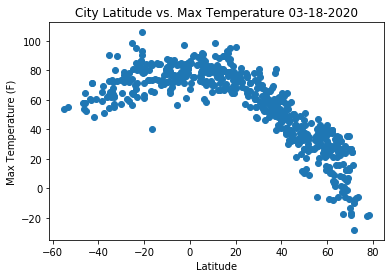

03-18-2020


In [6]:
import datetime
#getting current date and time
e = datetime.datetime.today()
#convert to needed form
date= e.strftime('%m-%d-%Y')



x_values = weatherdf['City Latitude']
y_values = weatherdf['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature ' + date)
plt.savefig('lattemp.png')
plt.show()
print (date)


This is describing the relationship between latitude and temperature. As we start from below the equator and go north, the temperatures increase steadily, but then rapidly go down in the norhern hemisphere.

#### Latitude vs. Humidity Plot

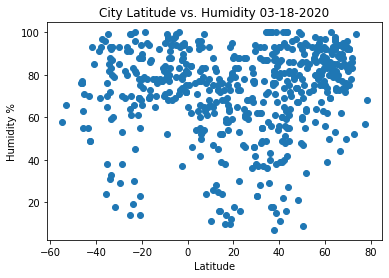

In [7]:
x_values = weatherdf['City Latitude']
y_values = weatherdf['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity ' + date)
plt.savefig('lathum.png')
plt.show()


No real relationship between latitude and humidity values as the plots seem random

#### Latitude vs. Cloudiness Plot

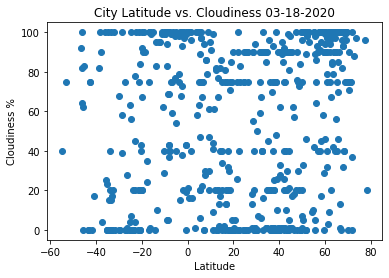

In [8]:
x_values = weatherdf['City Latitude']
y_values = weatherdf['Cloud coverage']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness ' + date)
plt.savefig('latcloud.png')
plt.show()


No real relationship between latitude and cloudiness values as the plots seem random

#### Latitude vs. Wind Speed Plot

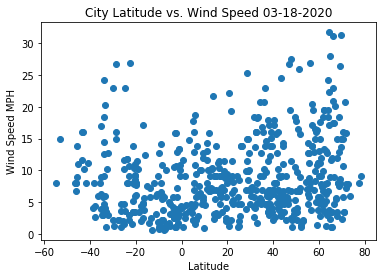

In [9]:
x_values = weatherdf['City Latitude']
y_values = weatherdf['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
plt.title('City Latitude vs. Wind Speed ' + date)
plt.savefig('latwind.png')
plt.show()

No real relationship between latitude and windspeed values as the plots seem random. 

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
#Nortern Hemisphere DataFrame

northdf= weatherdf.loc[weatherdf["City Latitude"] >=0]

#Southern Hemisphere DataFrame

southdf= weatherdf.loc[weatherdf["City Latitude"] <0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

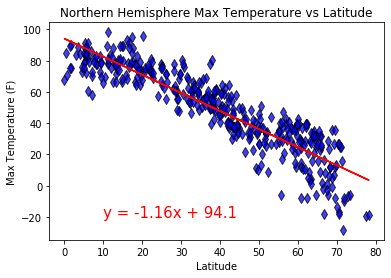

In [13]:
#values for x axis
norlat= northdf['City Latitude']

#values for y axis
nortemp = northdf['Max Temperature'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(norlat, nortemp)





regress_values = norlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(norlat, nortemp, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(norlat,regress_values,"r-")


plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere Max Temperature vs Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('regnortemplat.png')

plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

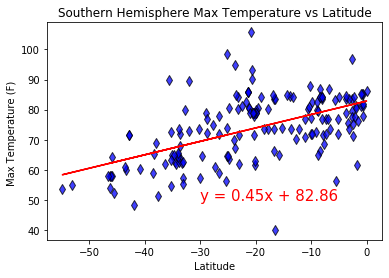

In [22]:
#values for x axis
southlat= southdf['City Latitude']

#values for y axis
southtemp = southdf['Max Temperature'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southtemp)





regress_values = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southtemp, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(southlat,regress_values,"r-")


plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.title("Southern Hemisphere Max Temperature vs Latitude")
plt.ylabel("Max Temperature (F) ")
plt.xlabel("Latitude")
plt.savefig('regsouthtemplat.png')

plt.show()

The graph pairs are modelling temperature based on latidudes for each hemisphere. There is an inverse relationship between weather latitude and temperature in the northern hemisphere, and a positive relationship between both in the southern. The temperature changes more in the northern hemisphere with the latitude than the southern due to the slope value, and there seems to be more variability in the values for the southern hemisphere due to the higher range of scatter.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

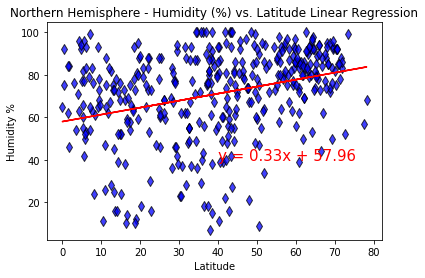

In [15]:
#values for y axis
norhumid = northdf['Humidity'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(norlat, norhumid)





regress_values = norlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(norlat, norhumid, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(norlat,regress_values,"r-")


plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig('regnorhumlat.png')

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

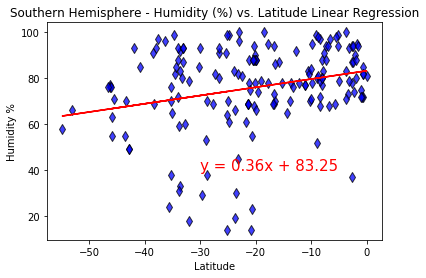

In [16]:


#values for y axis
southhumid = southdf['Humidity'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southhumid)





regress_values = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southhumid, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(southlat,regress_values,"r-")


plt.annotate(line_eq,(-30, 40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig('regsouthhumlat.png')

plt.show()

These pairs of graphs are making predictive analysis for humidity % based on latitude. There's a positve relationship between both variables, but seems to be a be changing more for southern hemisphere due to the steeper slope.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

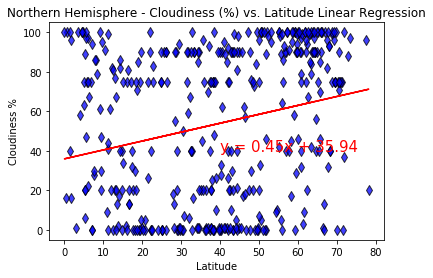

In [17]:
#values for y axis
norcloud = northdf['Cloud coverage'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(norlat, norcloud)





regress_values = norlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(norlat, norcloud, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(norlat,regress_values,"r-")


plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig('regnorcloudlat.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

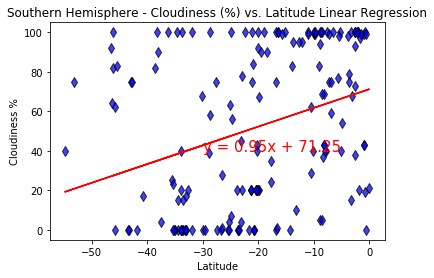

In [18]:

#values for y axis
southcloud = southdf['Cloud coverage'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southcloud)





regress_values = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southcloud, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(southlat,regress_values,"r-")


plt.annotate(line_eq,(-30, 40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig('regsouthcloudlat.png')

plt.show()

Cloudiness increases at a higher rate in the southern hemisphere when moving towards the equator, then it does when moving from the equator northwards, as the slope value is lower. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

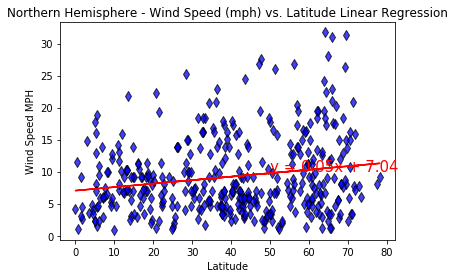

In [19]:
#values for y axis
norwind = northdf['Wind Speed'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(norlat, norwind)





regress_values = norlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(norlat, norwind, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(norlat,regress_values,"r-")


plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed MPH")
plt.xlabel("Latitude")
plt.savefig('regnorwindlat.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

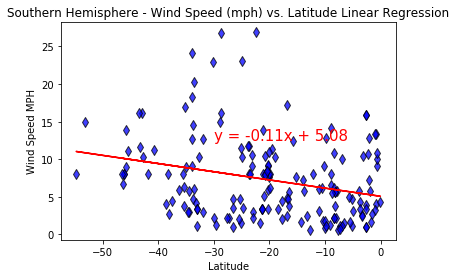

In [20]:
#values for y axis
southwind = southdf['Wind Speed'] 



(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southwind)





regress_values = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southwind, marker="d", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)


plt.plot(southlat,regress_values,"r-")


plt.annotate(line_eq,(-30, 12.5),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed MPH")
plt.xlabel("Latitude")
plt.savefig('regsouthwindlat.png')

plt.show()

Windspeed doesn't seem to be affected by latitude that much in either hemisphere. If we had to say something, it is very weakly decreasing in speed moving up to the equater in the sountern hemisphere and then again very weakly increasing speed when moving upwards in the northern part. 

Three Observable Trends:    
1) Temperature increases moving towards the equator and then more rapidly decreases after the equator moving upwards, maybe because there is more land in the north than south to measure this, but nevertheless still there.  
2) Both cloudiness and humidity increase at a higher rate towards the equator, then it does afterwards.  
3) The slope values for the regression model for wind speed are low, almost signifiying very little affect with windspeed based on latitude. This may due to the high amount of scatter in the values in the values which seems almost random. 